# 1D Wave Equation – Leapfrog Scheme

We solve the 1D wave equation:

$$
\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}, \quad 0 < x < L, \quad t>0
$$

- \(u(x,t)\) = displacement at position \(x\) and time \(t\)  
- \(c\) = wave speed  

---

## Finite Difference Discretization

Using central difference in space and Leapfrog in time:

$$
u_i^{n+1} = 2(1-r^2) u_i^n - u_i^{n-1} + r^2 (u_{i+1}^n + u_{i-1}^n)
$$

where 

$$
r = \frac{c \Delta t}{\Delta x}
$$

Stability condition: $r \le 1$

---

## Initial & Boundary Conditions

- Initial displacement: $u(x,0) = \sin(\pi x / L)$  
- Initial velocity: $\frac{\partial u}{\partial t}(x,0) = 0$  
- Boundary conditions: $u(0,t) = u(L,t) = 0$

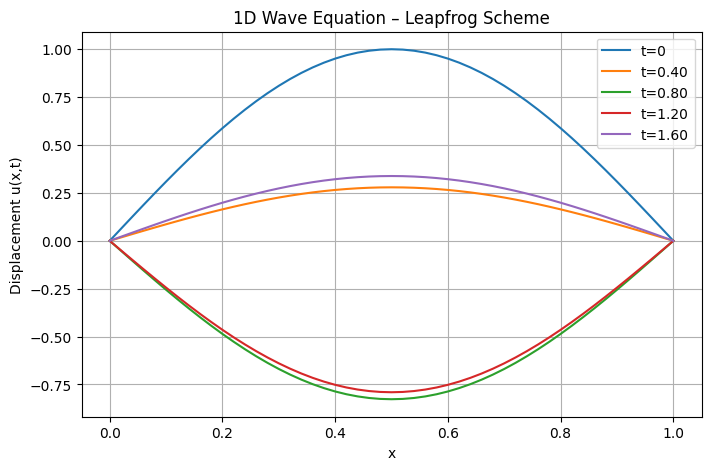

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0
c = 1.0
Nx = 50
dx = L / Nx
dt = 0.01
Nt = 200

r = c*dt/dx
if r > 1:
    raise ValueError("CFL condition violated! Reduce dt or increase dx.")

x = np.linspace(0, L, Nx+1)

# Initial conditions
u = np.sin(np.pi * x / L)
u_prev = u.copy()
u_next = np.zeros_like(u)

# Apply boundary conditions
u[0] = u[-1] = 0
u_prev[0] = u_prev[-1] = 0

plt.figure(figsize=(8,5))
plt.plot(x, u, label="t=0")

# First step (special initialization)
u_next[1:-1] = u[1:-1] + 0.5*r**2*(u[2:] - 2*u[1:-1] + u[:-2])
u_next[0] = u_next[-1] = 0
u_prev, u = u, u_next.copy()

# Time-stepping loop
for n in range(1, Nt):
    u_next[1:-1] = 2*(1-r**2)*u[1:-1] - u_prev[1:-1] + r**2*(u[2:] + u[:-2])
    u_next[0] = u_next[-1] = 0
    
    u_prev, u = u, u_next.copy()
    
    if n % 40 == 0:
        plt.plot(x, u, label=f"t={n*dt:.2f}")

plt.xlabel("x")
plt.ylabel("Displacement u(x,t)")
plt.title("1D Wave Equation – Leapfrog Scheme")
plt.legend()
plt.grid(True)
plt.show()

## Conclusion

- The Leapfrog scheme accurately simulates 1D wave propagation.  
- CFL condition $r = c \Delta t / \Delta x \le 1$ must be satisfied to avoid instability.  
- The method is second-order accurate in space and time.  
- Boundary conditions enforce fixed ends, and initial velocity is handled in the first step.  
- This provides a foundation for studying waves, vibrations, and later CFD applications.